<p style="text-align:left;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie3.png" alt="Drawing" style="width: 250px;"/></p>

<h1 style='text-align: center;'> Natural Language Processing </h1>
<a href='https://github.com/javierjevf'><h4 style='text-align: center;'> Javier Vázquez</h4> </a>

<p style="text-align:right;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie1.png" alt="Drawing" style="width: 250px;"/></p>

## Objectives:

1. Working with the IMDB's review dataset.
2. Use NLTK tools and Pandas to extract relevant information from the database.
3. Create visualizations to explore data and provide useful insight.

## Loading requirements

In this project, I will be using the IMDB Dataset found on Kaggle. For further informaton on this please be sure to hop in: <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>. The dataset consists on roughly 50 thousand reviews gathered from IMDB. 

The first step is to sort out our *data*. In this case, the idea is to remove markers that may cause unnecessary noise on the classification or analysis. Right now let's remove punctuation marks and convert every single character into lower case. Afterwards we will remove every word which doesn't add any value to the bag of words.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import  WordCloud
from PIL import Image
import pickle
import string
import nltk 
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# nltk.download('averaged_perceptron_tagger')


%matplotlib inline
sns.set_style("darkgrid")

# Loading the original database
movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    # Now just remove any stopwords
    # [print(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return nopunc

movies["review_nopunc"] = movies.review.apply(text_process)
movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

# movies = pd.read_csv("clean_movies_database.csv",index_col=False)#.drop(["review","review_nopunc"],axis=1)
# movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

In [8]:
movies.to_csv("clean_movies_database.csv",index=False)

## Creating a WordCloud 

One very intuitive way to present text data is by a word cloud, which is like a collage of words relating to each other. A word cloud is an "image" of words, commonly used to be a representation of the most common or relevant words found in a data set. We can use a library in Python called **wordcloud** which provides a lot of tinkering around different parameters when creating one of these word cloud figures. 

For this, let's show an example using a predefined shape. Given that we're using a movie data set, we can use an image of some popcorn to server as the contour of our figure. Some parts of the following code will help to visualize the frequency of some words, but later it will be used on lemmas and different tokenization techniques for a more in-depth analysis. 

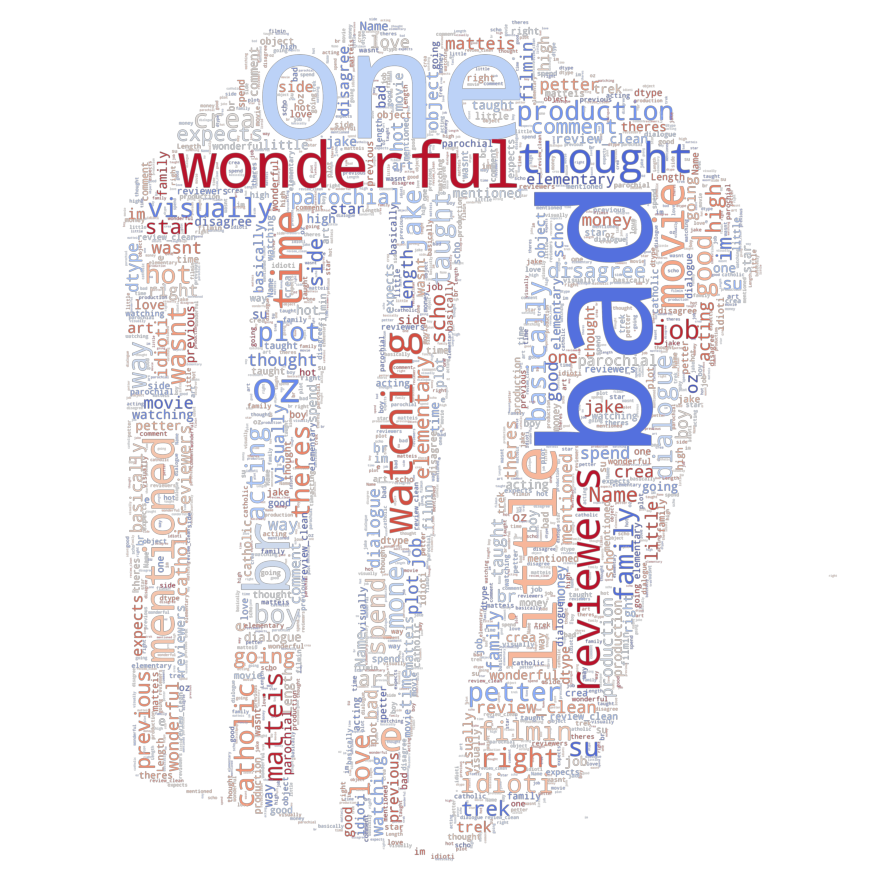

In [4]:
# Setting the size of the figure to be shown in the notebook
plt.figure(figsize=(18, 16))

# Array to create a mask used for the wordcloud. 
mask = np.array(Image.open(r"C:\Users\javie\Desktop\Python\Portfolio\imdbNLP\photo.png"))

# Create a WordCloud object that will get the parameters for editing and styling the word cloud.
cloud = WordCloud(background_color=None,
                prefer_horizontal=.5,
                colormap="coolwarm",
                stopwords = stopwords.words('english'),
                height=1080,width=1920,
                max_words=2000,
                mode = "RGBA",
                scale=4,
                # max_font_size=200,
                # relative_scaling=.8,
                repeat=True,
                # collocations= True,
                mask=mask,
                margin=1)
                
cloud.generate_from_text(str(movies.review_clean).replace("'",""))
for item in ["bad","br","oz","e","su","review_clean","Length","dtype","object"]:    
    cloud.words_.pop(item)
# cloud.generate(str(movies.review_clean[0:20000]).replace("'",""))
# cloud.to_file("movie3.png")

# Final editing on the PyPlot object which WordCloud works for as a wrapper.
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Keep reading on this subject on:

    https://www.datacamp.com/community/tutorials/wordcloud-python